# 데이터 불러오기

In [ ]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# 3차원 이미지로 바꾸기
from tensorflow.keras import backend
backend.image_data_format()

'channels_last'

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

print(X_train.shape, Y_train.shape)

n_in = X_train.shape[1:]
n_out = Y_train.shape[-1]

(60000, 28, 28, 1) (60000, 10)


## simple CNN 

In [ ]:
Y_test[0]

7

In [ ]:
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout, ReLU
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Nadam

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 sequential_28 (Sequential)  (None, 256)               23744     
                                                                 
 sequential_29 (Sequential)  (None, 10)                34698     
                                                                 
Total params: 58,442
Trainable params: 57,962
Non-trainable params: 480
_________________________________________________________________
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_54 (Conv2D)          (

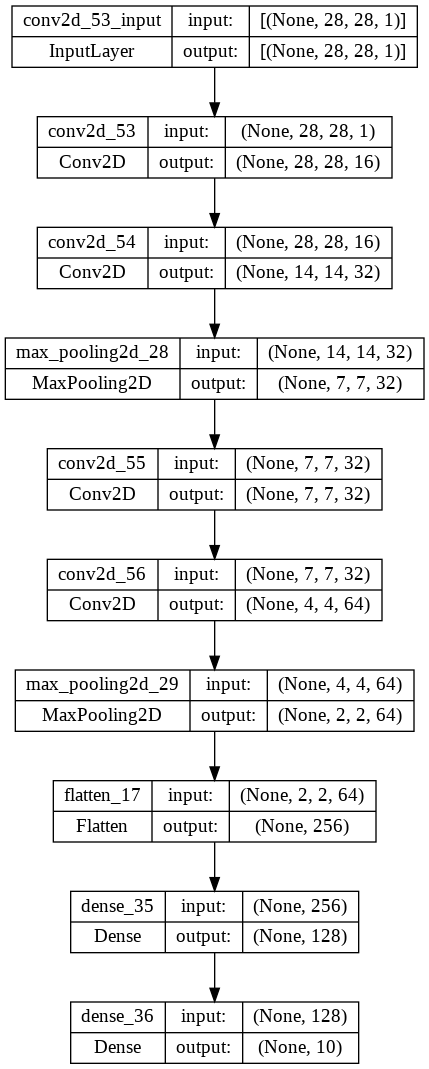

In [ ]:
def CNN(n_in, n_out):
    # Coding Time 
    # Feature Extraction
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=n_in))
    model.add(Conv2D(32, (3, 3), padding='same', strides=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 추가
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=n_in))
    model.add(Conv2D(64, (3, 3), padding='same', strides=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Classifier
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(n_out, activation='softmax'))
    
    return model


model.summary()

model=CNN(n_in, n_out)
model.summary()

from tensorflow.keras.utils import plot_model
%matplotlib inline
plot_model(model, show_shapes=True)

In [ ]:
from tensorflow.keras.optimizers import Adam
# optimizer Adam parameter tunning
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=1e-6, epsilon=None, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# change EarlyStopping parameter mode 
earlystopper = EarlyStopping(monitor='val_accuracy', patience=10, verbose=0, mode='max')
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, validation_split=0.2, callbacks=[earlystopper])

Epoch 1/40
375/375 [==============================] - 3s 6ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0556 - val_accuracy: 0.9890
Epoch 2/40
375/375 [==============================] - 2s 5ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.0635 - val_accuracy: 0.9872
Epoch 3/40
375/375 [==============================] - 2s 5ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.0704 - val_accuracy: 0.9851
Epoch 4/40
375/375 [==============================] - 2s 5ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.0676 - val_accuracy: 0.9872
Epoch 5/40
375/375 [==============================] - 2s 5ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0757 - val_accuracy: 0.9853
Epoch 6/40
375/375 [==============================] - 2s 5ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0963 - val_accuracy: 0.9818
Epoch 7/40
375/375 [==============================] - 2s 5ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0623 - val_accuracy: 0.9880
Epoch 

In [ ]:
# 모델의 정확도, 성능
loss_and_accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

79/79 [==============================] - 0s 4ms/step - loss: 0.0755 - accuracy: 0.9872
loss : 0.0755, accruracy : 0.9872


## batchNormalization&Dropout


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
activation_25 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 14, 14, 32)        128 

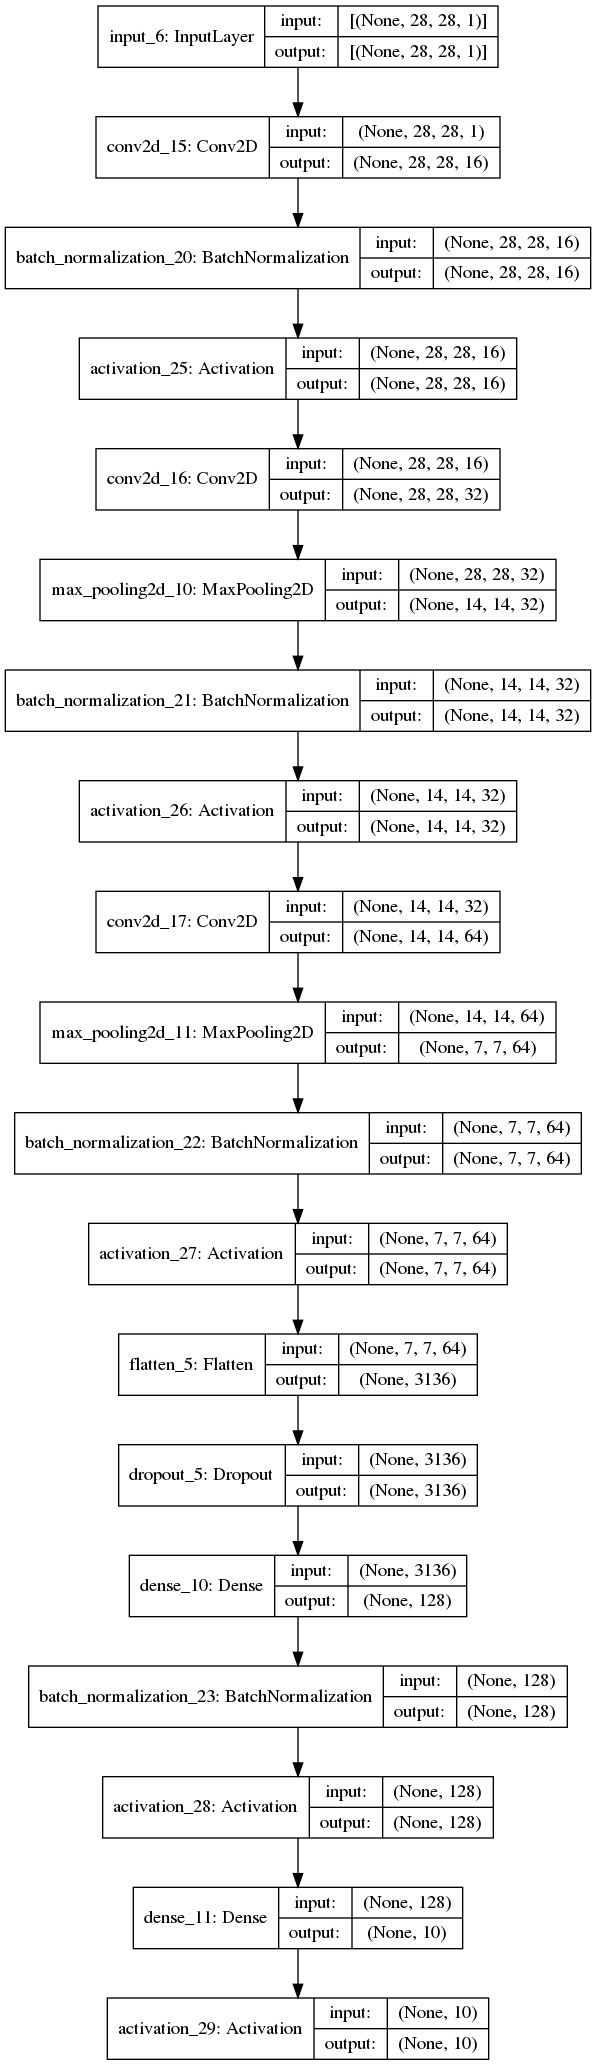

In [ ]:
# 과적합을 방지하기 위한 dropout과 batchnormalization를 추가한 모델
def CNN_Dropout(n_in, n_out):
    # Feature Extraction
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=n_in))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(32, (3, 3), padding='same',strides=(2, 2)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(64, (3, 3), padding='same',strides=(2, 2)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    # Classifier
    model.add(Flatten())
    model.add(Dropout(0.6))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(n_out, activation='softmax'))
    return model

def CNN_Dropout_func(n_in, n_out):
    input = Input(shape=(n_in))
    x = Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=n_in)(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=n_in)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(64, kernel_size=(3, 3), padding='same', input_shape=n_in)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Flatten()(x)
    x = Dropout(0.7)(x)
    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dense(n_out)(x)
    y = Activation('softmax')(x)
    model = Model(inputs = input, outputs = y)
    return model

model=CNN_Dropout_func(n_in, n_out)
model.summary()

from tensorflow.keras.utils import plot_model
%matplotlib inline
plot_model(model, show_shapes=True)

In [ ]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=1e-6, epsilon=None, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

earlystopper = EarlyStopping(monitor='val_accuracy', patience=15, verbose=0, mode='max', restore_best_weights=True)
final = model.fit(X_train, Y_train, batch_size=64, epochs=255, validation_split=0.2, callbacks = [earlystopper])

Epoch 1/255
750/750 [==============================] - 7s 8ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0268 - val_accuracy: 0.9950
Epoch 2/255
750/750 [==============================] - 6s 8ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0263 - val_accuracy: 0.9954
Epoch 3/255
750/750 [==============================] - 6s 8ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0258 - val_accuracy: 0.9953
Epoch 4/255
750/750 [==============================] - 6s 8ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0237 - val_accuracy: 0.9954
Epoch 5/255
750/750 [==============================] - 6s 8ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0234 - val_accuracy: 0.9960
Epoch 6/255
750/750 [==============================] - 6s 8ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0235 - val_accuracy: 0.9956
Epoch 7/255
750/750 [==============================] - 6s 8ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.0249 - val_accuracy: 0.9956

In [ ]:
loss_and_accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

79/79 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9958
loss : 0.0189, accruracy : 0.9958


In [ ]:
# 모델 저장하기
model.save('latest_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('latest_model.h5')

In [ ]:
# 결과 plotting
print(final.history['loss'])
print(final.history['val_accuracy'])

[0.004642010200768709, 0.005800494458526373, 0.005511745344847441, 0.004846836440265179, 0.004048551898449659, 0.00504886033013463, 0.003921584226191044, 0.004042772576212883, 0.004199875984340906, 0.004978527780622244, 0.0039726137183606625, 0.004191746935248375, 0.0051072523929178715, 0.004000319167971611, 0.00419566361233592, 0.005438634660094976, 0.004928102251142263, 0.004268949385732412, 0.003933408297598362, 0.00496431952342391, 0.0041120718233287334, 0.0048347474075853825, 0.004458782263100147, 0.0034796111285686493, 0.0034846579656004906, 0.004384397994726896, 0.003671392798423767, 0.003308776766061783, 0.003279563505202532]
[0.9950000047683716, 0.9954166412353516, 0.9953333139419556, 0.9954166412353516, 0.9959999918937683, 0.9955833554267883, 0.9955833554267883, 0.9951666593551636, 0.9950833320617676, 0.9955000281333923, 0.9950833320617676, 0.9952499866485596, 0.9955000281333923, 0.9963333606719971, 0.9956666827201843, 0.9948333501815796, 0.9956666827201843, 0.995750010013580

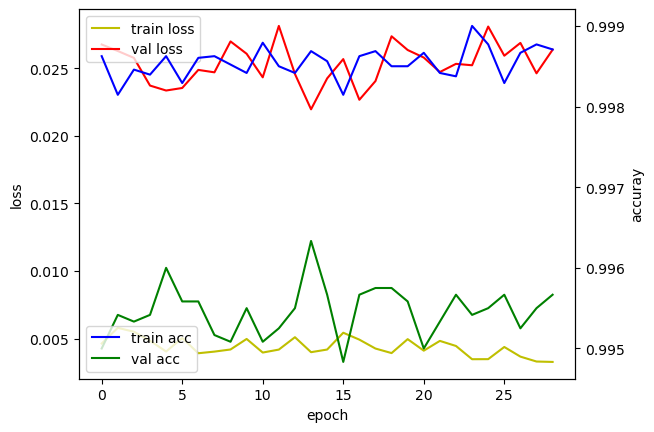

In [ ]:
# matplotlib를 이용하여 history 객체 내부에 저장된 값들을 graph로 표현
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(final.history['loss'], 'y', label='train loss')
loss_ax.plot(final.history['val_loss'], 'r', label='val loss')

acc_ax.plot(final.history['accuracy'], 'b', label='train acc')
acc_ax.plot(final.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 저장하고 싶을 경우
#fig.savefig('final.png')

real_label : 9, predict_label : 8


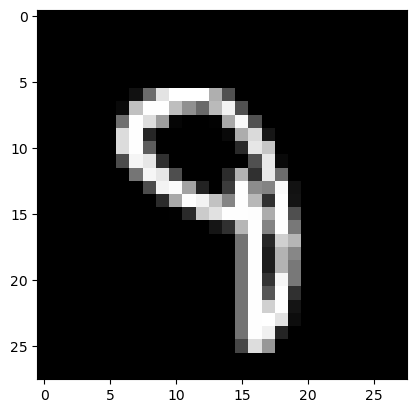

real_label : 2, predict_label : 7


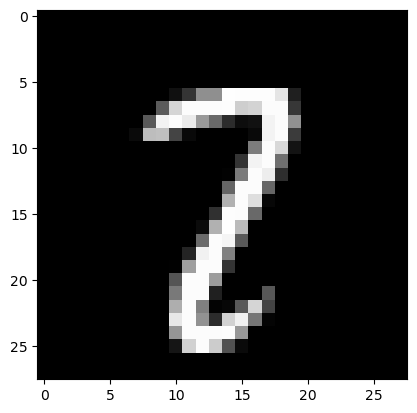

real_label : 6, predict_label : 0


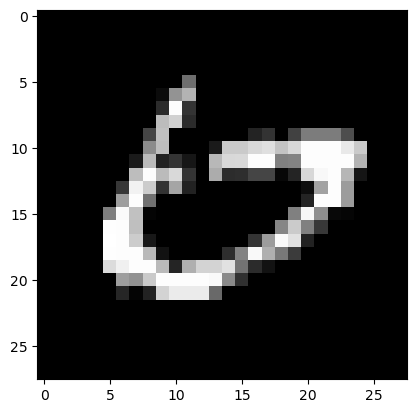

real_label : 8, predict_label : 3


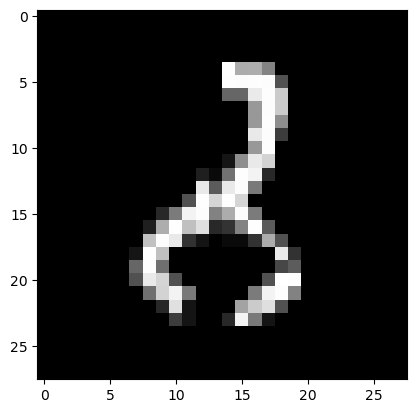

real_label : 1, predict_label : 7


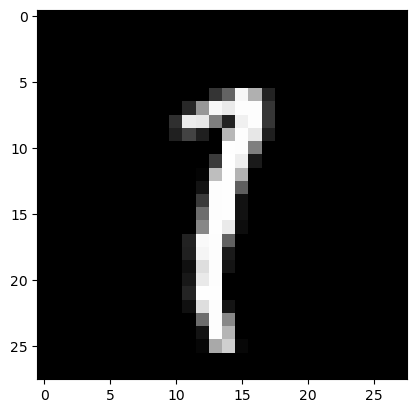

real_label : 8, predict_label : 9


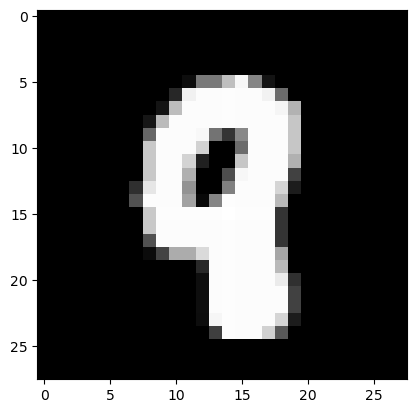

real_label : 6, predict_label : 5


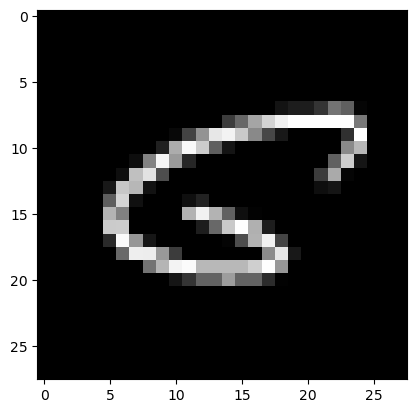

real_label : 7, predict_label : 4


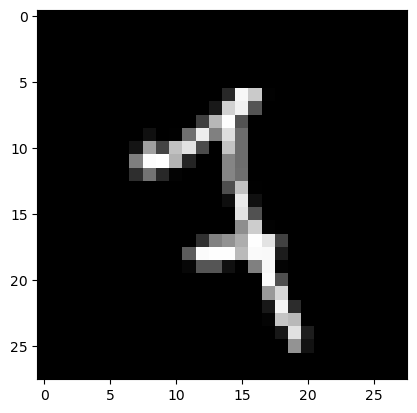

real_label : 4, predict_label : 6


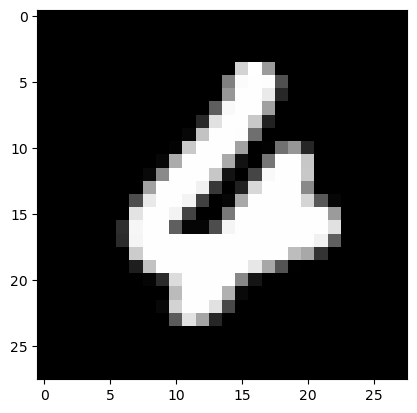

real_label : 9, predict_label : 4


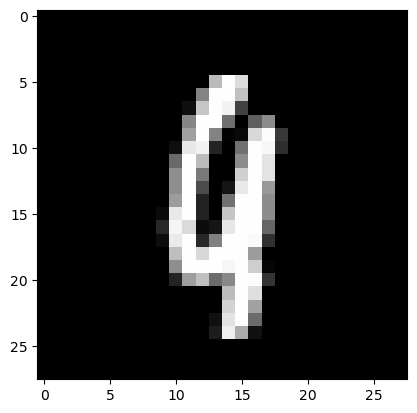

In [ ]:
# 틀린 샘플 찾기
def check_error(Number_Of_Error):
    
    # Coding Time
    cnt = 0
    for i in range(len(Y_test)):
        # 모델 예측 값 도출
        test_data = X_test[i].reshape(1,28, 28) 
        pred_y = model.predict(test_data, verbose=0)
        pred_y = pred_y.argmax()
        
        # 예측값과 라벨이 다를 경우, print와 샘플 확인
        if pred_y != Y_test[i]:
            print('real_label : {}, predict_label : {}'.format(Y_test[i], pred_y))
            plt.imshow(X_test[i], cmap='gray')
            plt.show()
            cnt +=1

        if cnt >= Number_Of_Error:
            break
            
check_error(10)

In [ ]:
import pandas as pd

# Coding Time
#X_test_flat, batch_size 활용하여 predict된 결과 list 만들기
pred_y = model.predict(X_test, batch_size = 10000, verbose=0)
Y_pred = [x.argmax() for x in pred_y]

# Pandas를 활용하여 confusion matrix 만들기 
data = {'Real' : Y_test, 'Predict' : Y_pred}
df = pd.DataFrame(data, columns=['Real','Predict'])
conf_mat = pd.crosstab(df['Real'], df['Predict'], rownames=['Real'], colnames=['Predict'])
print(conf_mat)

Predict    0     1     2     3    4    5    6     7    8     9
Real                                                          
0        977     0     1     0    0    0    1     1    0     0
1          1  1132     0     0    0    0    0     2    0     0
2          0     0  1030     0    0    0    0     2    0     0
3          0     0     0  1007    0    2    0     0    1     0
4          0     0     0     0  979    0    1     0    0     2
5          1     0     0     2    0  888    1     0    0     0
6          3     3     1     0    0    1  949     0    1     0
7          0     1     2     0    1    0    0  1024    0     0
8          0     0     0     1    1    0    0     0  970     2
9          0     0     0     0    5    1    0     0    1  1002


## 모델 합치기

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
def conv_maxpool_layers(n_in):
    # Coding Time
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(n_in)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', strides=(2, 2)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', strides=(2, 2)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Flatten())
    adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=1e-6, epsilon=None, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

def fc_layers(n_out):
    # Coding Time
    model = Sequential()
    model.add(Dropout(0.6))
    model.add(Dense(units=128, input_shape=(1568,)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(units=n_out, activation='softmax'))
    adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=1e-6, epsilon=None, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

def CNN_sum(n_in, n_out):
    
    # Coding Time
    
    #각 부분 모델
    feature_extractor = conv_maxpool_layers(n_in)
    feature_extractor.trainable=True
    ann_classifier = fc_layers(n_out)
    ann_classifier.trainable=True
    
    #두 모델을 합쳐 새로운 모델 정의(Functional Style)
    x = Input(shape=n_in)
    feature = feature_extractor(x)
    y = ann_classifier(feature)
    model = Model(inputs=x, outputs=y)
    
    '''
    Sequential Style
    model = Sequential()
    model.add(feature_extractor)
    model.add(ann_classifier)
    '''
    return model

In [ ]:
model = CNN_sum(n_in, n_out)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 256)               23744     
_________________________________________________________________
sequential_1 (Sequential)    (None, 10)                34698     
Total params: 58,442
Trainable params: 57,962
Non-trainable params: 480
_________________________________________________________________


In [ ]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=1e-6, epsilon=None, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

earlystopper = EarlyStopping(monitor='val_accuracy', patience=15, verbose=1, mode='max', restore_best_weights=True)
history = model.fit(X_train, Y_train, batch_size=64, epochs=255, validation_split=0.2, callbacks = [earlystopper])

Epoch 1/255
750/750 [==============================] - 6s 8ms/step - loss: 0.0559 - accuracy: 0.9812 - val_loss: 0.0401 - val_accuracy: 0.9877
Epoch 2/255
750/750 [==============================] - 6s 7ms/step - loss: 0.0535 - accuracy: 0.9826 - val_loss: 0.0317 - val_accuracy: 0.9906
Epoch 3/255
750/750 [==============================] - 6s 8ms/step - loss: 0.0498 - accuracy: 0.9836 - val_loss: 0.0351 - val_accuracy: 0.9885
Epoch 4/255
750/750 [==============================] - 6s 7ms/step - loss: 0.0473 - accuracy: 0.9845 - val_loss: 0.0312 - val_accuracy: 0.9910
Epoch 5/255
750/750 [==============================] - 6s 8ms/step - loss: 0.0482 - accuracy: 0.9843 - val_loss: 0.0311 - val_accuracy: 0.9912
Epoch 6/255
750/750 [==============================] - 6s 7ms/step - loss: 0.0481 - accuracy: 0.9844 - val_loss: 0.0338 - val_accuracy: 0.9902
Epoch 7/255
750/750 [==============================] - 6s 7ms/step - loss: 0.0457 - accuracy: 0.9846 - val_loss: 0.0308 - val_accuracy: 0.9912

In [ ]:
loss_and_accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

79/79 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9928
loss : 0.0251, accruracy : 0.9928
